In [1]:
import pandas as pd
import difflib

In [2]:
data_path = 'data/task_2'

In [3]:
with open(f"{data_path}/universities.txt", encoding="utf8") as f:
    universities = f.readlines()

In [4]:
universities = [university.rstrip('\n') for university in universities]

In [5]:
len(universities)

757

In [6]:
universities[:10]

['Автономная некоммерческая организация высшего образования "Национальный институт бизнеса"',
 'Адыгейский государственный университет',
 'Академия акварели и изящных искусств Сергея Андрияки',
 'Академия государственной противопожарной службы Министерства Российской Федерации по делам гражданской обороны, чрезвычайным ситуациям и ликвидации последствий стихийных бедствий',
 'Академия гражданской защиты МЧС России',
 'Академия маркетинга и социально-информационных технологий',
 'Академия права и управления Федеральной службы исполнения наказаний',
 'Академия русского балета им. А. Я. Вагановой',
 'Академия социального образования',
 'Академия социального управления']

In [7]:
universities_frame = pd.DataFrame({'word': universities})
universities_frame.head(10)

,word
0,Автономная некоммерческая организация высшего ...
1,Адыгейский государственный университет
2,Академия акварели и изящных искусств Сергея Ан...
3,Академия государственной противопожарной служб...
4,Академия гражданской защиты МЧС России
5,Академия маркетинга и социально-информационных...
6,Академия права и управления Федеральной службы...
7,Академия русского балета им. А. Я. Вагановой
8,Академия социального образования
9,Академия социального управления


In [8]:
def clean_query(query):
    return ' '.join(query.strip().split()).capitalize()

In [9]:
with open(f"{data_path}/queries.txt", encoding="utf8") as f:
    queries = f.readlines()

In [10]:
queries = [query.rstrip('\n') for query in queries]

In [11]:
len(queries)

50000

In [12]:
queries[:10]

['Северо-западный Государственнмй Медицинский Университет Имени И. И. Мечникова',
 'ННоорсосийский яПттигорского годарсэвенного унивеситета',
 'Ростовский Институт Дащт Прехпринниматея',
 'сАНКТ-пЕтербУГГсКиЙ ГОСУДАРСТВЕННЫЙ АКАДЕМИЧЕСКИЙ ИНСТиТУт живописИ, СКУЛЬПТУЫР И АРХИТЕкТуРЫ ИМЕНИ И.Е. РЕПИНА',
 'Санкт-Петербургская духовная академия',
 'Тихоокеанскийй гсударственный медицинский уыивеерситгт',
 'Пеерский нционшльный иисследвательский политехнический унивреситет',
 'Казанский Национальный Исследовательский Технически йУниверситет Им Антуполева-аи',
 'РОССИЙСКИЙ ГОУДАРСТВЕННЫЙ  АГРАРНЫЙ УНИВЕРСИТЕТ - МСХА МЕНИК .А. ТМИИРЯЗЕВА',
 'Дзержинский Филиал Нижегородскгоо Государственного Университета Имени Ни Лобачевского']

In [13]:
queries_frame = pd.DataFrame({'word': queries})
queries_frame.head(10)

,word
0,Северо-западный Государственнмй Медицинский Ун...
1,ННоорсосийский яПттигорского годарсэвенного ун...
2,Ростовский Институт Дащт Прехпринниматея
3,сАНКТ-пЕтербУГГсКиЙ ГОСУДАРСТВЕННЫЙ АКАДЕМИЧЕС...
4,Санкт-Петербургская духовная академия
5,Тихоокеанскийй гсударственный медицинский уыив...
6,Пеерский нционшльный иисследвательский политех...
7,Казанский Национальный Исследовательский Техни...
8,РОССИЙСКИЙ ГОУДАРСТВЕННЫЙ АГРАРНЫЙ УНИВЕРСИТЕ...
9,Дзержинский Филиал Нижегородскгоо Государствен...


In [14]:
def levenshtein_distance(s, t):
    m = len(s)
    n = len(t)
    d = [[0] * (n + 1) for i in range(m + 1)]  

    for i in range(1, m + 1):
        d[i][0] = i

    for j in range(1, n + 1):
        d[0][j] = j
    
    for j in range(1, n + 1):
        for i in range(1, m + 1):
            if s[i - 1] == t[j - 1]:
                cost = 0
            else:
                cost = 1
            d[i][j] = min(d[i - 1][j] + 1,      # deletion
                          d[i][j - 1] + 1,      # insertion
                          d[i - 1][j - 1] + cost) # substitution   

    return d[m][n]

In [15]:
def find_correct_university(query, universities):
    match = difflib.get_close_matches(query, universities, n=1, cutoff=0.8)
    if match:
        return match[0]
    return None

In [16]:
result = []

In [17]:
%%time
for query in queries:
    if query in universities:
        result.append(query)
        continue
    query = clean_query(query)
    correct_university = find_correct_university(query, universities)
    if correct_university:
        result.append(correct_university)
    else:
        result.append(query)
        print(query)

Институт инфокоммуникаций (филиал сибгути)
Ярославский государственный ннуивверрситет им. кк.д. уишского
Ядерной энеретики (филаил сспбпу)
Филиал вунц вмф «военно-морская академия» калининграде
Институт высоких тенологий
Государсстиенныйй етхнический униевюситет
Санк-петербугрский госудаарственный телекоммункиаций им. проф. м.а. боч
Старооскольский филиал мйри-рггру
Оронежсипий филиал гумр фимм аакаровва
Школа-сттудия им. вл. и. немировича-дачненко при мхат им. а. п. чехова
Нациноальнй унивесритет «мэии»
Волжский филиал национального университета «мэи»
Ижевская государственная акайемиэ
Старооскольссский лиал мгри-рггру
Котлгсский филиал гумрф им. маакарова
Курский филиал финансового рпи пзаительстев российскбй федераыии
Фёлиал вцнц вмф «военно-моръкая кадемия» в г калининграде
Кумеруский филиал оребндгског гоусдарсвтеннпго
Сосдурственный бедагогичсеий универистет
Севео-кавказский ффтиал ргу
Санкт-веыебурггский унбверситте профсоюзов
Санкт-петербургский филиал рта имени вб бобкова
Остов

Тюменский институт кулььтуры
Государсснвенный бгарны универстет
Каадемия русскоо балеета имени а я вааноовя
Котласский филиап думр фммаарфа
Волгфгравсский филиал москвоского универсгтетта мфюа
Котласский филиал гумрф имени макароав
Школа-студия (институт) м вл и немировича-данченко при мхат им а п чехова
Ярславсский госсударственнй ьниверсиитет им. к..д.ушинскоо
Школа-студия (институт) имени вл и нецировича-данченко при мхати мзни а п чехова
Волжский лфииал национельного универсиетаа «мэи»
Государтгенная сельсконояйтвеншая акаддемия
Химико-тенхологически институт (филиал книту)
Альметьевсккий филиал тисби
Казанский огударствнеынй энергетический
Госуддаственный аграрн й унивесритет и.м а.а. ежевскзго
Ставроплоьский медицинский уиверситет
Санкт-петербургский филиал рта имени в.б. бобшова
Западно-сибирский фиеах рггуп
Гуманитарный в екатеринбурге
Военно-возудная академив им проф не жуковсккого у ъа гагарина
Наоиональный университе «мэи»
Университет реави
Ярославвский госудайственый учивер

Государственный институт кинъ и телевидения
Котласский филиа гумрф макарова
Льетьевский филиал"т исбии"
Школа-студия (институт) имени вл и немировича-данченко при мхат имени а п чехова
Староосхольскй филиал мгри-рггру
Флиал московского ггосударственного унивечситета м. в. лймонносова
Сеуеро-западный илиал ьосноовсккого ниститута
Санкт-петербурргский университеп яетеериинарной мдыцины
Акадеим ярусскоого балета иимени а. яя.вагановой
Крымски чфифиал рггуп
Гчсудюсртвенный унивцрситет им. х.м. черекива
Нижнекамский филиал московского университета
Ибтитут экономики и
Казанксий глсудартвенный архиткетурно-строчтельнйы
Северо-западный иинститут управленяи ранхигя
Волгоргадсская мвд рзосии
Калинмнгрхдвкий нститут экоонмики (филиал ссппбутуиэ)
Краснорскй госарсвтенныйу новерситет
Стаьооощкольскиий филиа лмгри-рггра
Осточно-сибирский ффилиал ргуп
Северо-западный филиал московског института
Кировский инситут (филиал) мусковского университета
Диполматическая акадеияя пфи ди рфф
Кадаяский инновацин

Государственный универсииет им. а.н. косыгина
Инсститут экномки ииъ
Университеэ трранспнрта (миит)
Ноовтроицкий филиал нацциоанльного исследоватчльфкого универстиета «мисис»
Заппдно-сибирский филиал ргуп
Госудачственнфй гумантанры йуниверситет
Росповскм йфилиас ргуб
Унивреситет управлеиня "тисби"
Санкт-петербургский филиал рта имени б бобкова
Иркутский месицинский университет
Роствоскд фрлиал пуп
Ггосуадрственньй унивестет сеервиса
Крымский филил ргуп
Фзлиал рммат( измово)
Исслечоваяельский медицински йуниверсиетт
Санкт-петербургский филиал рта имени в.б. бобкова
Кумретауский еииал оренбурргского госдарственнзгоо
Севро-ападню иинститут ранхигс
Альмметьевский филииал тисби
Старооскольский филиал мгри-рггру
Дкола-студия (институт) им вл и немирожчаа-даченко при мхат им а п етчва
Наережночнлинский кфу (лфил)
Вжронжсик йнститут мвд россии
Октлаасскйи филиа лгумрф и.м макаррова
Российскки йуниверситет имени г.в.пеханнова
Уральский филар гууп
Томский архтктурно-строытельный унивесритет
Ирэа 

Северо-западныйи нитуту пправления ранхигс
Альметьевский филиаа л"тисби"
Государственнъй электротехнический университет «лэти» им. в. и. ульянова
Высшее театральное училище (институт) им. м. с. щепкина
Школа-студия (институт) имени вл и немировича-данченко при мхаат имени а п чехова
Котсский фиилал гумрф им макарова
Институт высоки технологий
Дипломатичесакя академяии пци мид ррф
Гоударственная меддицинска ааеемия
Елабужксийй кууф (филиа)
Новосибирский военный институт итени армии и.к. яковлева
Военно-воздушная академия им. н.е. жуковского
Волгоградский филиал мосоквскоъо университета мфюа
Воолго-вяткси фйиалил мтуси
Санкт-петеербурскяа духовна яакадеми
Челябинский институт культуры
Ярославский яосударсвенный унвехситет детидова
Инситут эконопки и упрабения
Школа-сдудия (институт) имени вл и немировтча-данченко при мхат имени а п чехова
Егородский нациобальныйи сслеодвоаетльский университет
Заапаадно-подмосквны институт (филиал мрат)
Государственный технологиический университет «станки

Шкоола-тсудия (иннститут) имеми вл и немировича-данечнко при мхат имени а п чехова
Филиал уральского федфральноого университета еини первого президена россии б. н. ельцина
Хнститут экономисекиих снязкй
Санкт-петебурггский институт искусств
Институт эконномиик и
Каазнский (приволжский) уиёвесиет
Российскиий осудасртвеный аграрный юниверситет мсха к. а. тимирязева
Еевро-каввказскщй ифлиал московского интитута
Ифститут эконоомик,и педагогики жп рава
Российскяа гусдарственфая академия ёскутв
Соуударственныя ниститут рссокго языка им ас пушкинр
Внточно-сибрский инсттеутв нутренних делл рф
Уааальский нграрный уиверситте
Восочно-исибрскийф ьлиал ргуп
Инсттиут еемнежмента ранхигс
Бугульминский флиал книту
Сакнт-петмрбургский филиал рта имени в.б. бобкова
Российская академия туризма
Московфский универсиет с. ю. витуе
Ростовский филиа лргп
Котласский филиаа гумрф им макарова
Уунульмлнский ифлпал нкиту
Липецкий казачий институ технологзй и управления (филиал)) фгбоу во "московский государственый 

Мосая гуммаинтарная аакедмтя
Ънститут экяномических связей
Ккзаанскийй (привлткий) унниверсиитет
Иссчедовательский медицниски йуниверситет
Школа-студия (институт) имени вл и немировича-даныенко при мхат имени а п чехова
Институт туризм (филиал рмат)
Нижгородский государственный унивсриттет им. н.и
Саёкт-петербургски йфииаъ рттаз м вб бобкопа
Моковский унверситет с.ю.витте
Котласский фиал гумф им макарв
Вятская государственняа академия
Государсдюеенный медицинскбй уинвеерсите
Тиоокеаанский мециицинсски йуниверситет
Госуддрасвтенный медицингкий унивоеситтет
Гомудасртвеннный умзыкально-педагогический институут ми.м.м
Граждансйой защиты мчс россии
Московский университте имени м.в.ломоносова
Иилиал московского государтсвенного унверситета м.в.ломобосова
Хритиансска ягуаниарная академия
Ояский гсоударсственный медицинский
Старооскольский технологичщский интитути м.а. а
Бурятский инфокоммуникаций (филиа сибгути)
Ярзнаский государственный рауиоехничееский
Прииволжским филиал ррцу
Санкт-метербу

Филиал «котелсники»у ниверситета «дубна»
Государственный институт кино и телевидения
Мирэа - ехнологическй униввесритет
Нижегородский филиал московског оинститута
Униизерсиьет раиз
Всеро-западный инсттиут ранхигс
Санкт-пеетрбургский филижл рта имени вб ббобкова
Казйнспая государстенная академия ветеринарно йедиицны мени нэ бааумана
Мосовский лингвистичесий униерситдт
Бурятск йинфоокммуникаций (фцлиал сибгуит)
Иковсккий институт (милиа) московского университет
Московский государственнб унишерситт леса (мыищинский филиаа лмгту им. н. у.
Государственный электротехнический университет «лэти» им. в.и. ульянова (ленина)
Унънверсит есеинергия
Члеяибняки йиннститут культуры
Южно-уальский агранрый университет
Ростоский филиал ргуп
Аадемия живсоиши, вяния и зодчейтва ильи глазсноа
Исследовательсккий технологический нуиверситет ««мсёс»
Школа-студия (институт) имени вл. и. немировича-данченко при мхат имени а.п. чехова
Универрситет реавиз
Государственный нститут кино и телевидения
Госдуарственная 

Ухиввресиет ераввиз
Ссеверо--запаадный ифститут урпавлнеияр анхигс
Государственный электротехнический университет «лэти» им. в.и. ульяаова (ленина)
Астаханский теххнический униврситет
Северо-зцадный нсититут упъавлеиняр днхигс
Крымский федералььфый унивврстиет вернадского
Московская государственная консерватория имени п.и. чайковского
Литературоый инситут имеси а. ш. горь
Осударственный социрлььно-педаоггический универсиюе
Филиал «протвно» университтета «дубна»
Чоковскиий уиесритет имени с.ю. витме
Меедицинсааий реаоз в москве
Соочинксяй филиал российского друж ынродов
Московакй филиал рммат (измайлво)
Волго-втский ффлиал мтуси
Моский госдаушстуенный универстет им .ф.м. достоевского
Шола-студия (институ) имени вл. и. немировича-днченко при мхат имени а. п.чехова
Уинверситте лпралнию тиххби
Ссанкт-петербургский филиал рта им.вв.б
Влогркдсая акдаемия мд уосии
Российский университет имени г.в.плехаанова
Росийский огсударственный универитет иимени аа. и. грезена
Ылсшая школа искуусст дд(ка

Севюорр-кавкзаский филиал московскгоо института
Волжсикй флиал междуанродноог юридичесрого
Котласский филиал гумрф имени макарова
Ростовский филиа лргуп
Академя яр имид щф
Университет репвиз
Волгорадская (инститмт) имм. п.а. серебрякова
Воено-воздушная бкадемия имени проф. н. е. жууковского
Унверситет транспорта (щиит)
Институт медунрраоной и пррава
Мсоеернская праовлсавная деховная семинария
Военно-воздушна яакадемия и. пыоф.. н.е.жукощскохо
Альметьевсти йфилиал "тисби"
Овронесжикй педагоъический униаертсет
Мсолленская сельскохозяйственная академия
Высш еетеатральное учияище (институт )им.м.с
Инновационнный университет имени в.г. тимирясова (иэуп)
Вворюннежсеий филиал гумрфф им макпрова
Есверо-западный институт упрравления ранхис
Орловский филиалл фииннасового пзи правительстве российской феъеррациии
Калужский филиал российского аграрного универитета -- мсха им. к.а. тимирязева
Ядерной энергетики (филиал спбп)у
Институт экономики
Поволжыыкий унивеситет телдкоммуникалийй и информатики


Уральскчй медиицинский университет
Йоссдисаыт
Двангороодский гуманитано-технничческий (филиал) гуап
Междунарродная академия бизнеса и новых (мубинт)
Лаьметьевский филиал исиб
Вдронежский филиа глумрф и ммакарова
Краснояррксий государственный мдеицинский униеврситет им. сроф.в.ф
Брятский инфокоммуникаций (филиал сибгути)
Пемская фрммацевтичческйя ааакадемия
Школа-студия (инстиут) им вл и немиовича-данченко при мхат иъ а п чехаа
Российский аграрный унивреситет - мсха имени к.а. тимирязева
Инстиутт всыокъ технологий
Нижегородский филиал московского инститжта
Росудасрёвненый инсртитут русского языка ио. а.с
Саанкт-петербургскый филаал рта иимени в.б. бобова
Диполмаическая аакадемия пи мид фр
Мосоквская государствення коснерватрия им.п. и
Университет раевиз
Донской аграрный университет
Фрязинский флиал ррсссийского техноогичексого мирэа
Стадропольский юедиинский университет
Нижегородский филиал московсого института
Нижегородский тенхическй униврситет . р.е. алексеева
Балтийёкий госуарсцвейй

Оызо-вятский филлиан мтуси
Северо-заапдный филиал московского института
Сеевроо-кавказский филиал моковского институат
Елабужский кфу (филиал)
Рязанскийй мосударственный медциивсий им. алад. и.п.. павлова
Грждданскй защиты мчс россии
Росэовский филиа ргуп
Институт (филаич )уральского федерального университета имени первог резидент ароссии б. н.ельцина
Аастраханский филиал междуароджогго инсоитутч
Челбялнскнй имсттиитут культург
Московский ебласнтой унивесритет
Ёосточно-сибгрсикй филмх ргуп
Ууниверситет реавиз
Уральский ифлиал ргуп
Омский осударственный ттеххниечский
Высшее ттеатральнное учильще и(нсгитут) им. м. с
Центръльный филиал ргуп
Государтсвенный университет им. х.м. бербекова
Филлал сериев посад оскосвкого уницерситетаа с.ю. ивтте
Институю иинфпкоммуникацй (фииллиал сибуотии)
Ммсыёсккий флиаал вшни
Идпломтическая академия пи мид рф
Нионекамский филиал московского университета
Самарский институт фсин россиии
Пирволжький филиал уп
Госддарственный эектроетхнический университчт «лэ

Самырская госудаьтвкнная академия
Сибирсский унивирсите тпоцебительской
Щнститут тораслевого мнееджммент ранхигс
Мирэа - етхнологический университет
Филиал внуц вмф «вноно-морская акаемия» в г. какининграде
Оренбургскщ ааграрный унивесиеттт
Институт инфокоммуникаций (филиаы ибсгути)
Гражданской защиты мчс россии
Альметьеквсий филиаь "тисббии"
Институт (филиал) уральского федерального университета имени первого президента россиии б.н. ельцина
Акачемияхх орового искуостваа им с попиа
Мстёрскй филиа вшни
Иолго-ятски флиал мтусси
Тоомсоий ахритектурн-строителньый ууниверситет
Ростовскийи ннститут (гилиал) ввсероссийского универстиетта юстифии
Национальны университет «мэи»»
Российсаий аграрный университет - мсха имени к.а. тимирязева
Школа-студия (институт) имени вл. и. немировича-данченко при мхат имени а.п.чехова
Московская госудаственая кнсервгтория ми. п.и
Государсттвенныйу нивеыситет сервиса
Волго-вятский фиилал мтуси
Российски унерситет ддуржсё
Филяал казаскогои нновационного унивесри

Военно-морская акаедимя адмирала флцьа советкого сюозак узнецова
Школа-студия (институт) имени вл. и. немировича-данченко при мхат имени а. п.чехова
Москвский фщлижл рмат (измайлово)
Пермская фамацевтическая академия
Инновационный университет именни в.г. тимирясова (иэуп)
Казанский иннвоационный унуиверситет в.г.тимиррясов
Балтийскй осударутвенныйт ехнический удиверситтет «военнмех» имени д. .ф
Ижшвсая досударственная аадемияя
Академия чмени а. ф. можайского
Ядерной энергетики (филиал спбп)у
Щйуугльимнсикй илиал книту
Тюменский институт кулььтуры
Институт инфокоммуникаций (финилал ибгути)
Волггорадский филиал московского университета мфюа
Цензральн флиа гуп
Кировский нститут (оилиал) москквского унивреситета
Санкт-петербругский институт культуры
Новосбиирсский тецаралный иснтитут
Владицосттокский ффлиалр оссийскй таоженонй
Альметьевский филаил "тисби"
Унивефситят урривленя "ибси"
Российский агарный унивеерситет - мсха имени к...а. тимирязева
Академия при мид рф
Золгов-ткский филл мтуси

In [18]:
len(result)

50000

In [19]:
result

['Северо-Западный государственный медицинский университет им. И. И. Мечникова',
 'Новороссийский филиал Пятигорского государственного университета',
 'Ростовский институт защиты предпринимателя',
 'Санкт-Петербургский государственный академический институт живописи, скульптуры и архитектуры имени И. Е. Репина',
 'Санкт-Петербургская православная духовная академия',
 'Тихоокеанский государственный медицинский университет',
 'Пермский национальный исследовательский политехнический университет',
 'Казанский национальный исследовательский технический университет им. А.Н.Туполева-КАИ',
 'Российский государственный аграрный университет - МСХА имени К.А. Тимирязева',
 'Дзержинский филиал Нижегородского государственного университета им. Н.И. Лобачевского',
 'Уральский федеральный университет имени первого Президента России Б. Н. Ельцина',
 'Рязанский государственный агротехнологический университет им. П.А. Костычева',
 'Институт инфокоммуникаций (филиал сибгути)',
 'Российская академия музыки 

In [20]:
output = open('answers.txt', 'w')
for r in result:
    output.write(r + '\n')

output.close()

**Result:** 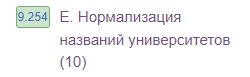